# Анализ и визуализация данных

**_______________________________________________________________________________________________________________________________**

**Загрузим всё необходимое: зависимости, сущности и модули:**

In [1]:
%run preset.py

___________________________________________________________________________________________________________________________

**Настройка текущий тетрадки (notebook):**

In [2]:
# Установка количества отображаемых строк:
pd.set_option("display.max_rows", 75)

# Установка количества отображаемых столбцов:
pd.set_option("display.max_columns", 25)

# Установка ограничения на количество отображаемых символов записи:
pd.set_option("display.max_colwidth", 45)

# Настраиваем тему графиков:
plt.style.use("dark_background")

___________________________________________________________________________________________________________________________

**Имортируемые данные для дальнейший работы:**

In [3]:
base_df = pd.read_parquet(prep_data_url)
df = pd.read_parquet(prep_data_url)

___________________________________________________________________________________________________________________________

**Посмотрим на имеющиеся данные:**

In [4]:
print(f"Количество строк dataframe-а: {df.shape[0]}\nКоличество столбцов dataframe-а: {df.shape[1]}")

Количество строк dataframe-а: 8478449
Количество столбцов dataframe-а: 3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8478449 entries, 2011-01-01 00:00:00 to 2024-07-17 00:00:00
Data columns (total 3 columns):
 #   Column              Dtype  
---  ------              -----  
 0   subject_name        object 
 1   actual_consumption  float64
 2   datetime            object 
dtypes: float64(1), object(2)
memory usage: 258.7+ MB


In [6]:
df.head(3)

,subject_name,actual_consumption,datetime
index,,,
2011-01-01 00:00:00,Алтайский край,1313.0,2011-01-01 00:00:00
2011-01-01 00:00:00,Амурская область,870.0,2011-01-01 00:00:00
2011-01-01 00:00:00,Архангельская область,970.0,2011-01-01 00:00:00


___________________________________________________________________________________________________________________________

**Рассмотрим подробнее список регионов:**

In [7]:
print(
      f"Количество субъектов исследования: {len(df.subject_name.unique())}\n\nСписок субъектов исследования:", 
      *df.subject_name.unique(), sep='\n'
     )

Количество субъектов исследования: 75

Список субъектов исследования:
Алтайский край
Амурская область
Архангельская область
Астраханская область
Белгородская область
Брянская область
Владимирская область
Волгоградская область
Вологодская область
Воронежская область
Забайкальский край
Ивановская область
Иркутская область
Кабардино-Балкарская Республика
Калининградская область
Калужская область
Карачаево-Черкесская Республика
Кемеровская область - Кузбасс
Кировская область
Костромская область
Краснодарский край
Красноярский край
Курганская область
Курская область
Ленинградская область
Липецкая область
Московская область
Мурманская область
Нижегородская область
Новгородская область
Новосибирская область
ОЭР Хабаровского края
Омская область
Оренбургская область
Орловская область
Пензенская область
Пермский край
Приморский край
Псковская область
Республика Башкортостан
Республика Бурятия
Республика Дагестан
Республика Ингушетия
Республика Калмыкия
Республика Карелия
Республика Коми
Республи

**Рассмотрим мощность значений регионов:**

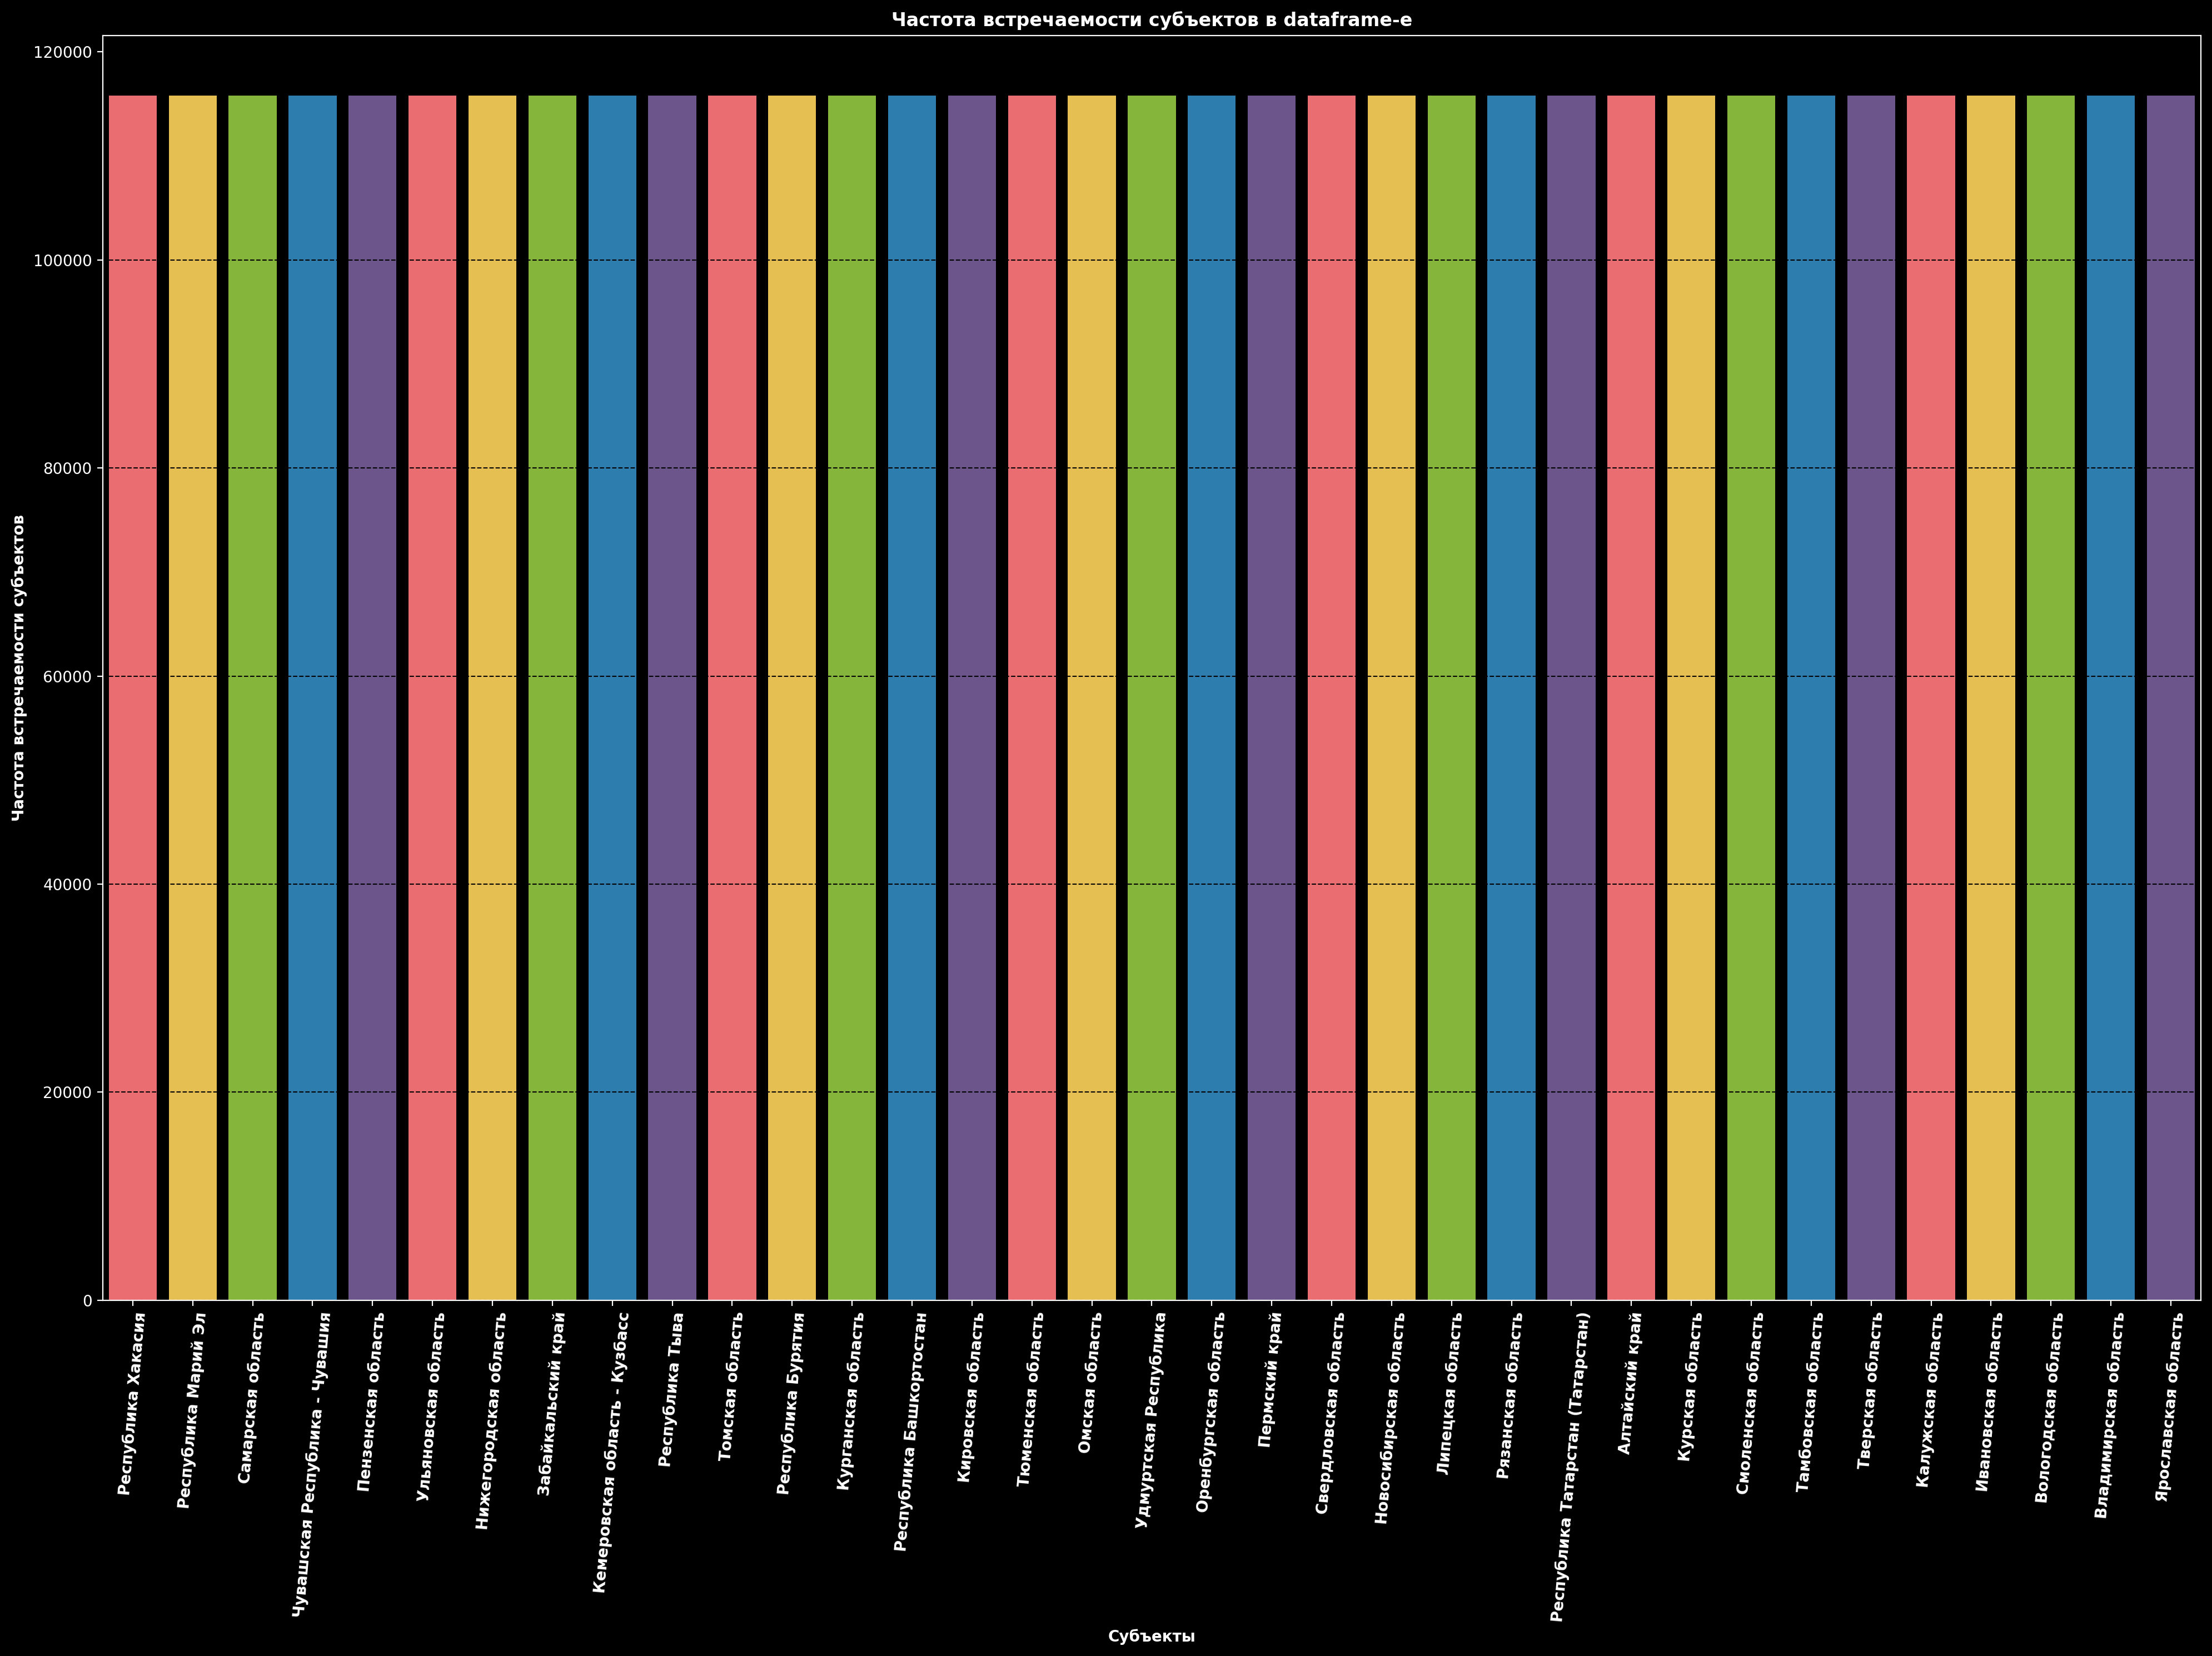

In [30]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

# Заголовок графика:
plt.title("Частота встречаемости субъектов в dataframe-е", fontweight="bold")

# Создание сетки на графике:
plt.grid(True) 

# Настройки сетки графика:
plt.grid(
         color="black",
         linestyle='--',
         linewidth=0.75
        )

# Подпись оси OX:
plt.xlabel("Субъекты", fontweight="bold")

# Подпись оси OY:
plt.ylabel("Частота встречаемости субъектов", fontweight="bold")

# Поворот названий категорий:
plt.xticks(rotation=85, fontweight="bold")

# Создание сущности графика:
sns.barplot(
            x=df["subject_name"].value_counts().index[:35],
            y=df["subject_name"].value_counts().values[:35],
            palette=custom_palette
           );

# Прорисовка графика:
plt.tight_layout()
plt.show()

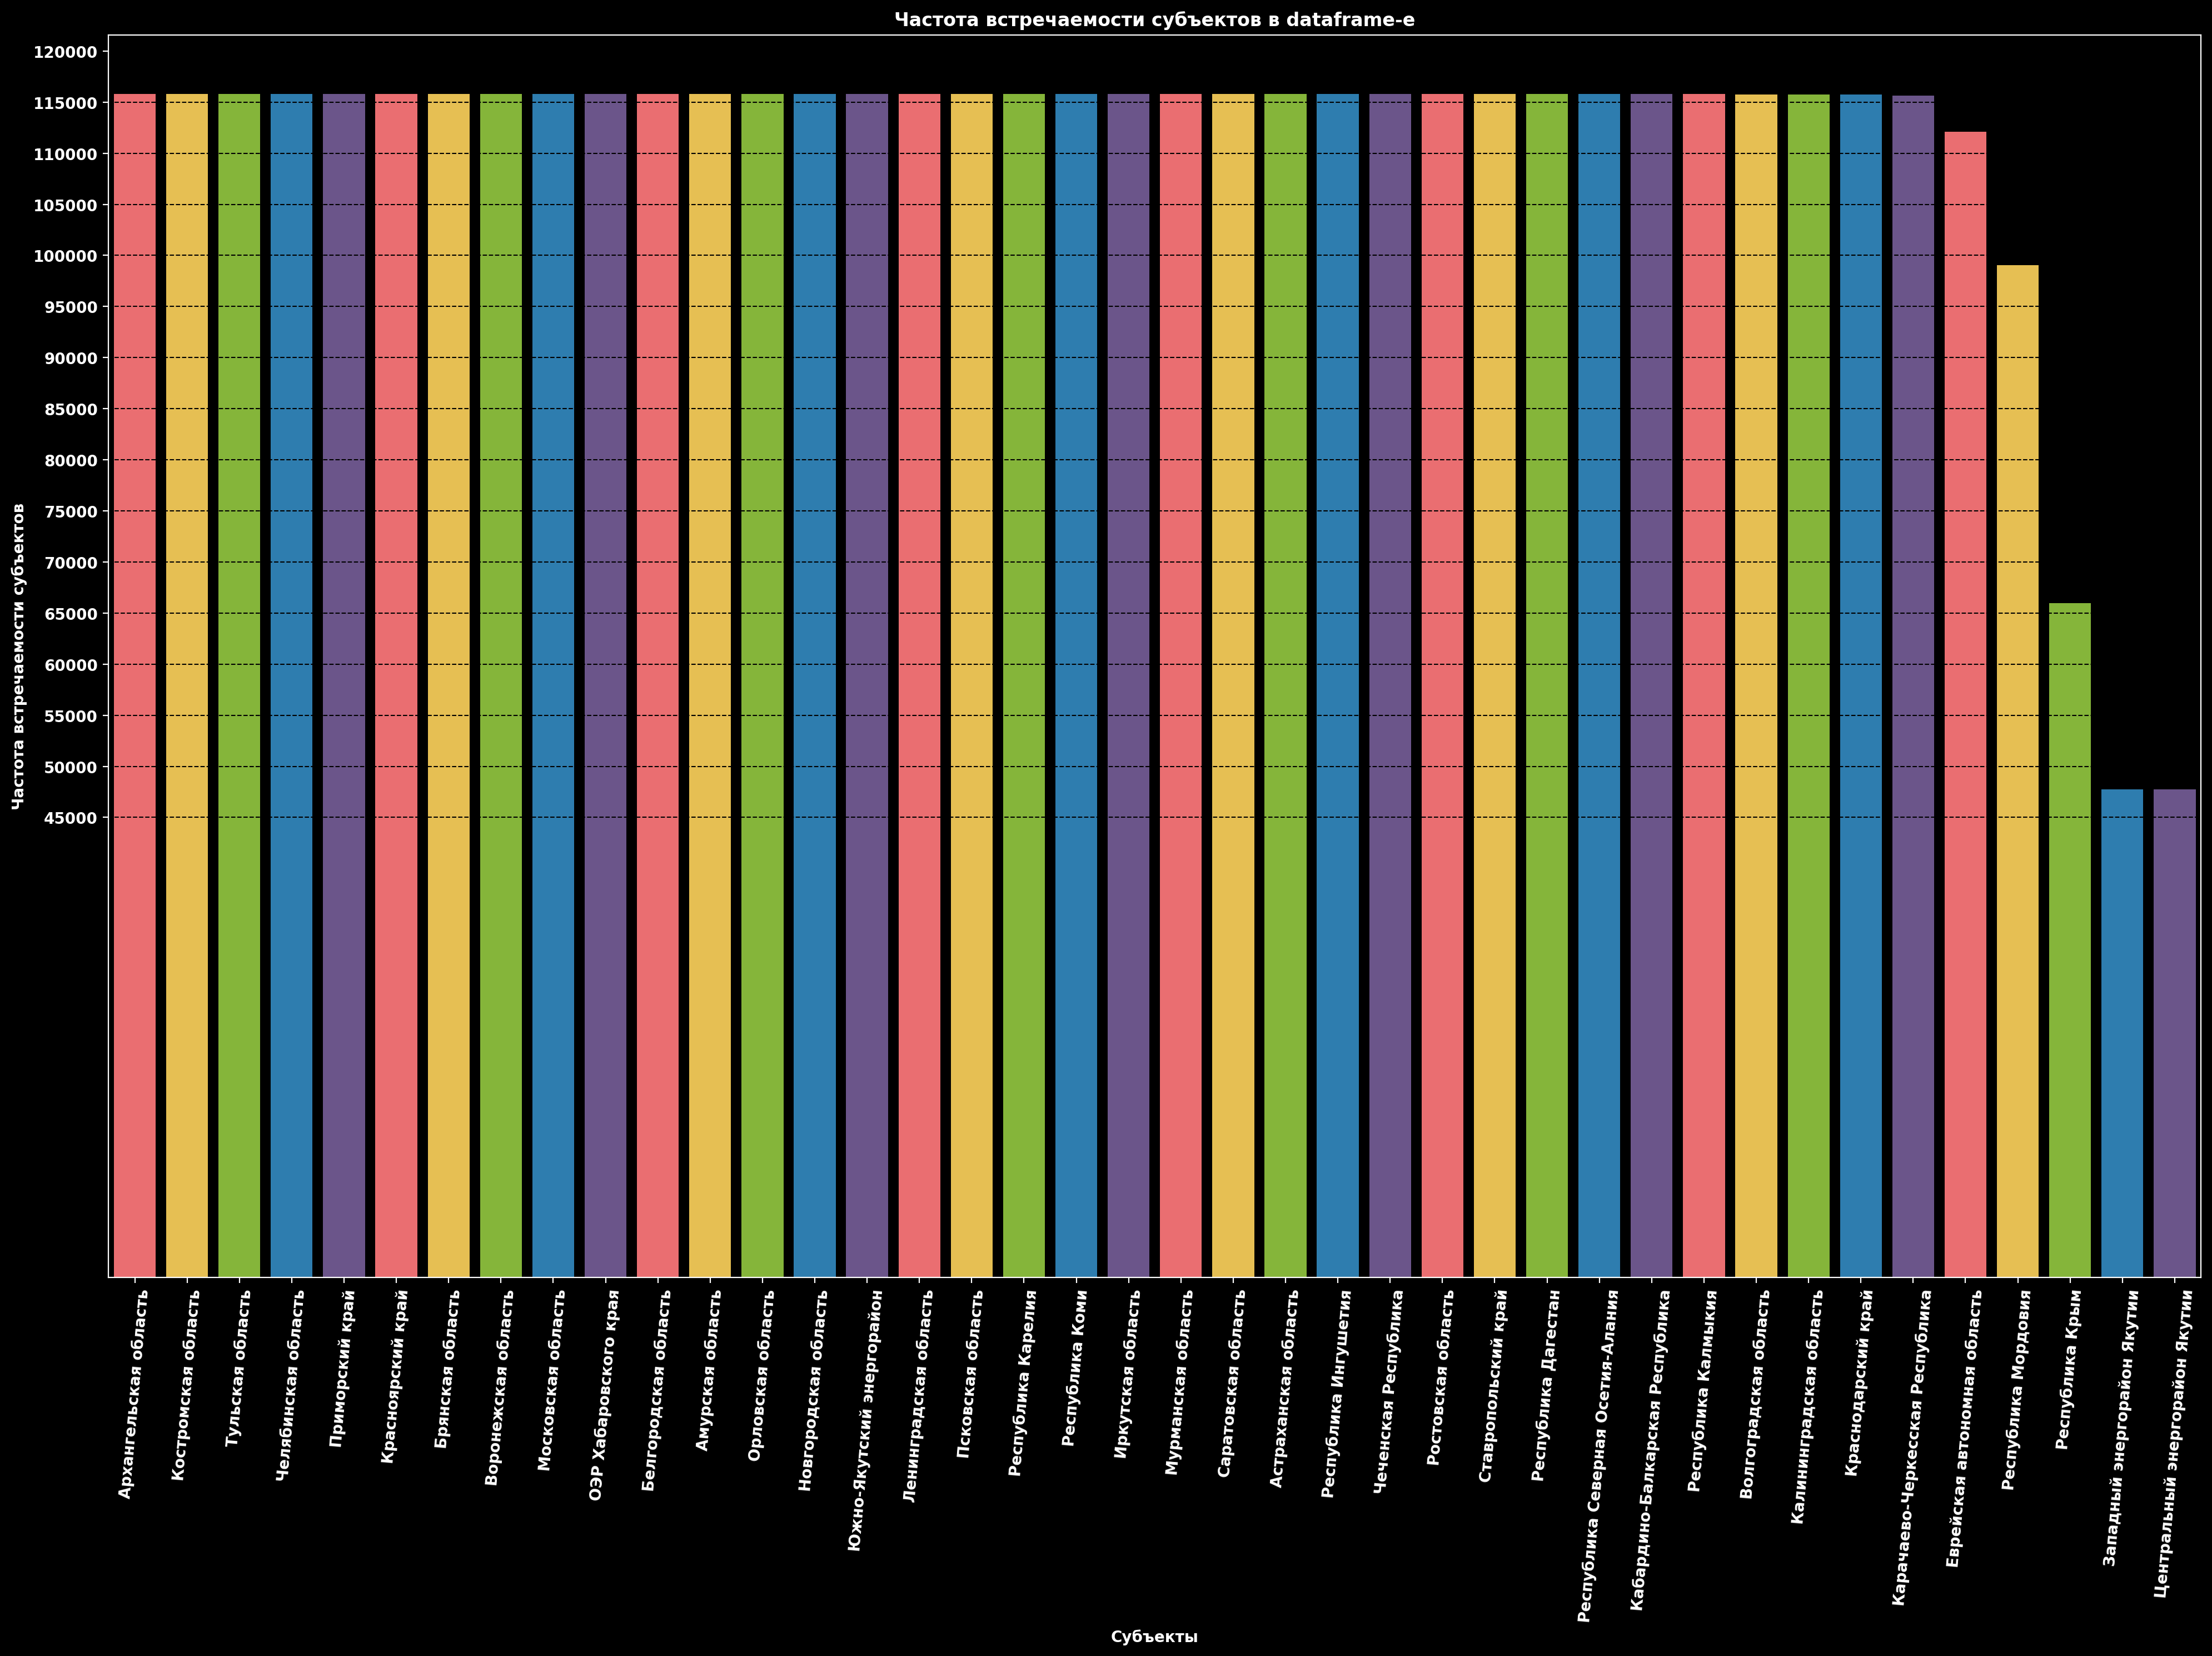

In [32]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

# Заголовок графика:
plt.title("Частота встречаемости субъектов в dataframe-е", fontweight="bold")

# Создание сетки на графике:
plt.grid(True) 

# Настройки сетки графика:
plt.grid(
         color="black",
         linestyle='--',
         linewidth=0.75
        )

# Подпись оси OX:
plt.xlabel("Субъекты", fontweight="bold")

# Подпись оси OY:
plt.ylabel("Частота встречаемости субъектов", fontweight="bold")

# Поворот названий категорий:
plt.xticks(rotation=85, fontweight="bold")

# Частота делений OY шкалы графика:
plt.yticks(np.arange(
                     45000,
                     125000,
                     5000
                    ), fontweight="bold")

# Создание сущности графика:
sns.barplot(
            x=df["subject_name"].value_counts().index[35:],
            y=df["subject_name"].value_counts().values[35:],
            palette=custom_palette
           );

# Прорисовка графика:
plt.tight_layout()
plt.show()

**Пять субъектов имеют меньше количество записей. Это может сказаться на важности данных субъектов как признаков.**

___________________________________________________________________________________________________________________________

**Рассмотрим среднии показатели электропотребления субъектов:**

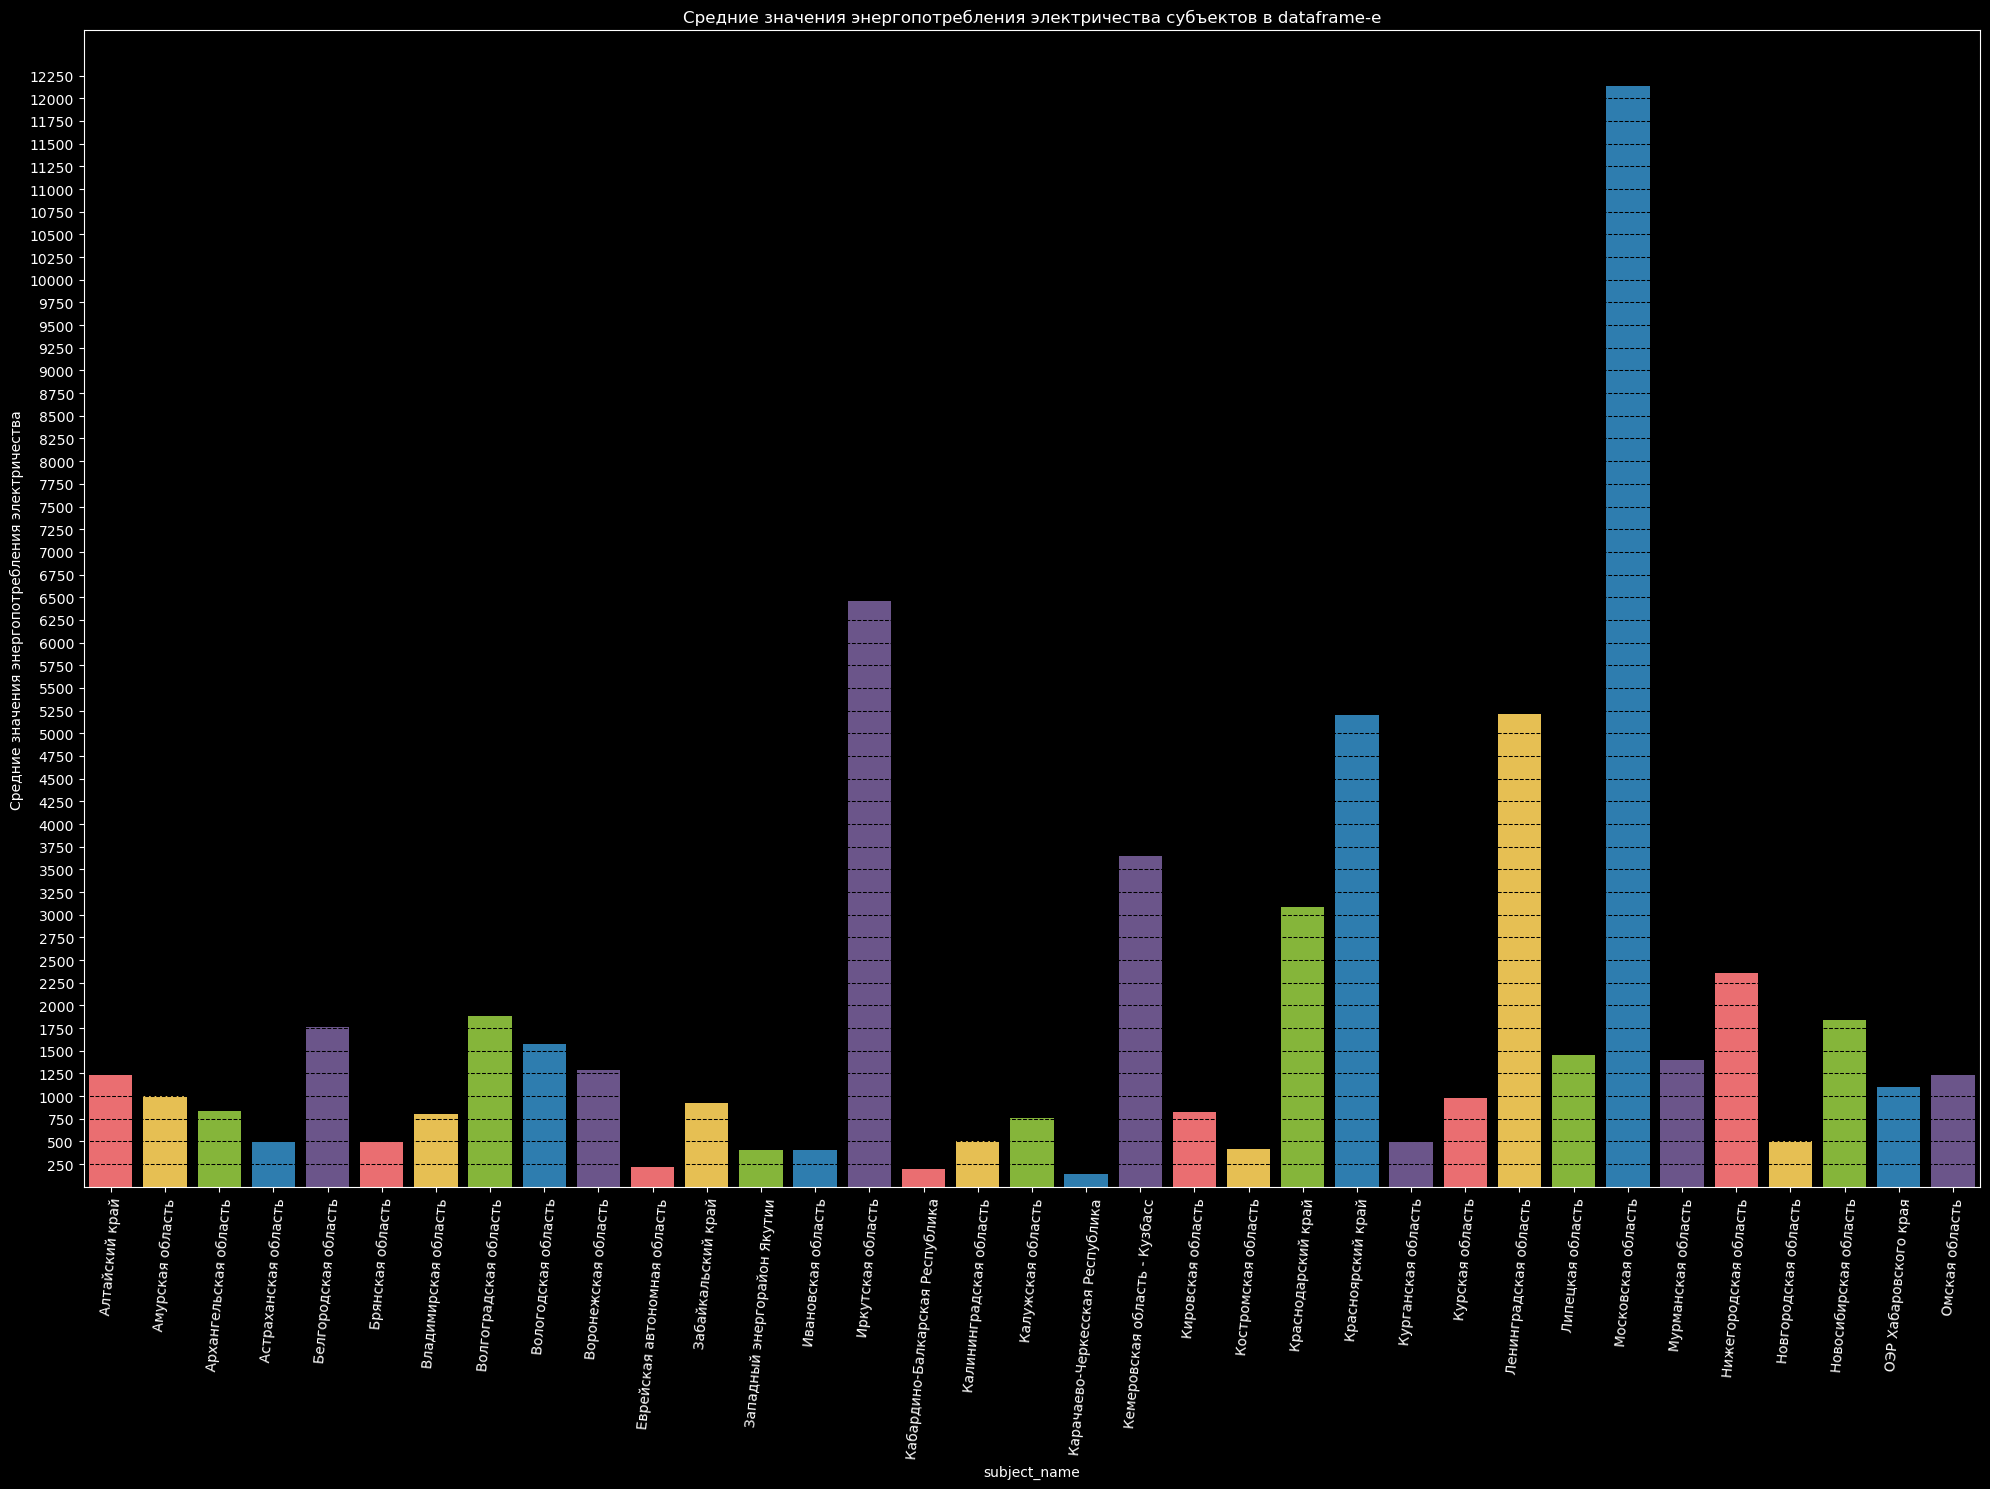

In [10]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

# Заголовок графика:
plt.title("Средние значения энергопотребления электричества субъектов в dataframe-е")

# Создание сетки на графике:
plt.grid(True) 

# Настройки сетки графика:
plt.grid(
         color="black",
         linestyle='--',
         linewidth=0.75
        )

# Подпись оси OX:
plt.xlabel("Субъекты", fontweight="bold")

# Подпись оси OY:
plt.ylabel("Средние значения энергопотребления электричества", fontweight="bold")

# Поворот названий категорий:
plt.xticks(rotation=85, fontweight="bold")

# Частота делений OY шкалы графика:
plt.yticks(np.arange(
                     250,
                     12500,
                     250
                    ), fontweight="bold")

# Создание сущности графика:
sns.barplot(
            x=df.groupby(by="subject_name")["actual_consumption"].mean().index[:35],
            y=df.groupby(by="subject_name")["actual_consumption"].mean().values[:35],
            palette=custom_palette
           );

# Прорисовка графика:
plt.tight_layout()
plt.show()

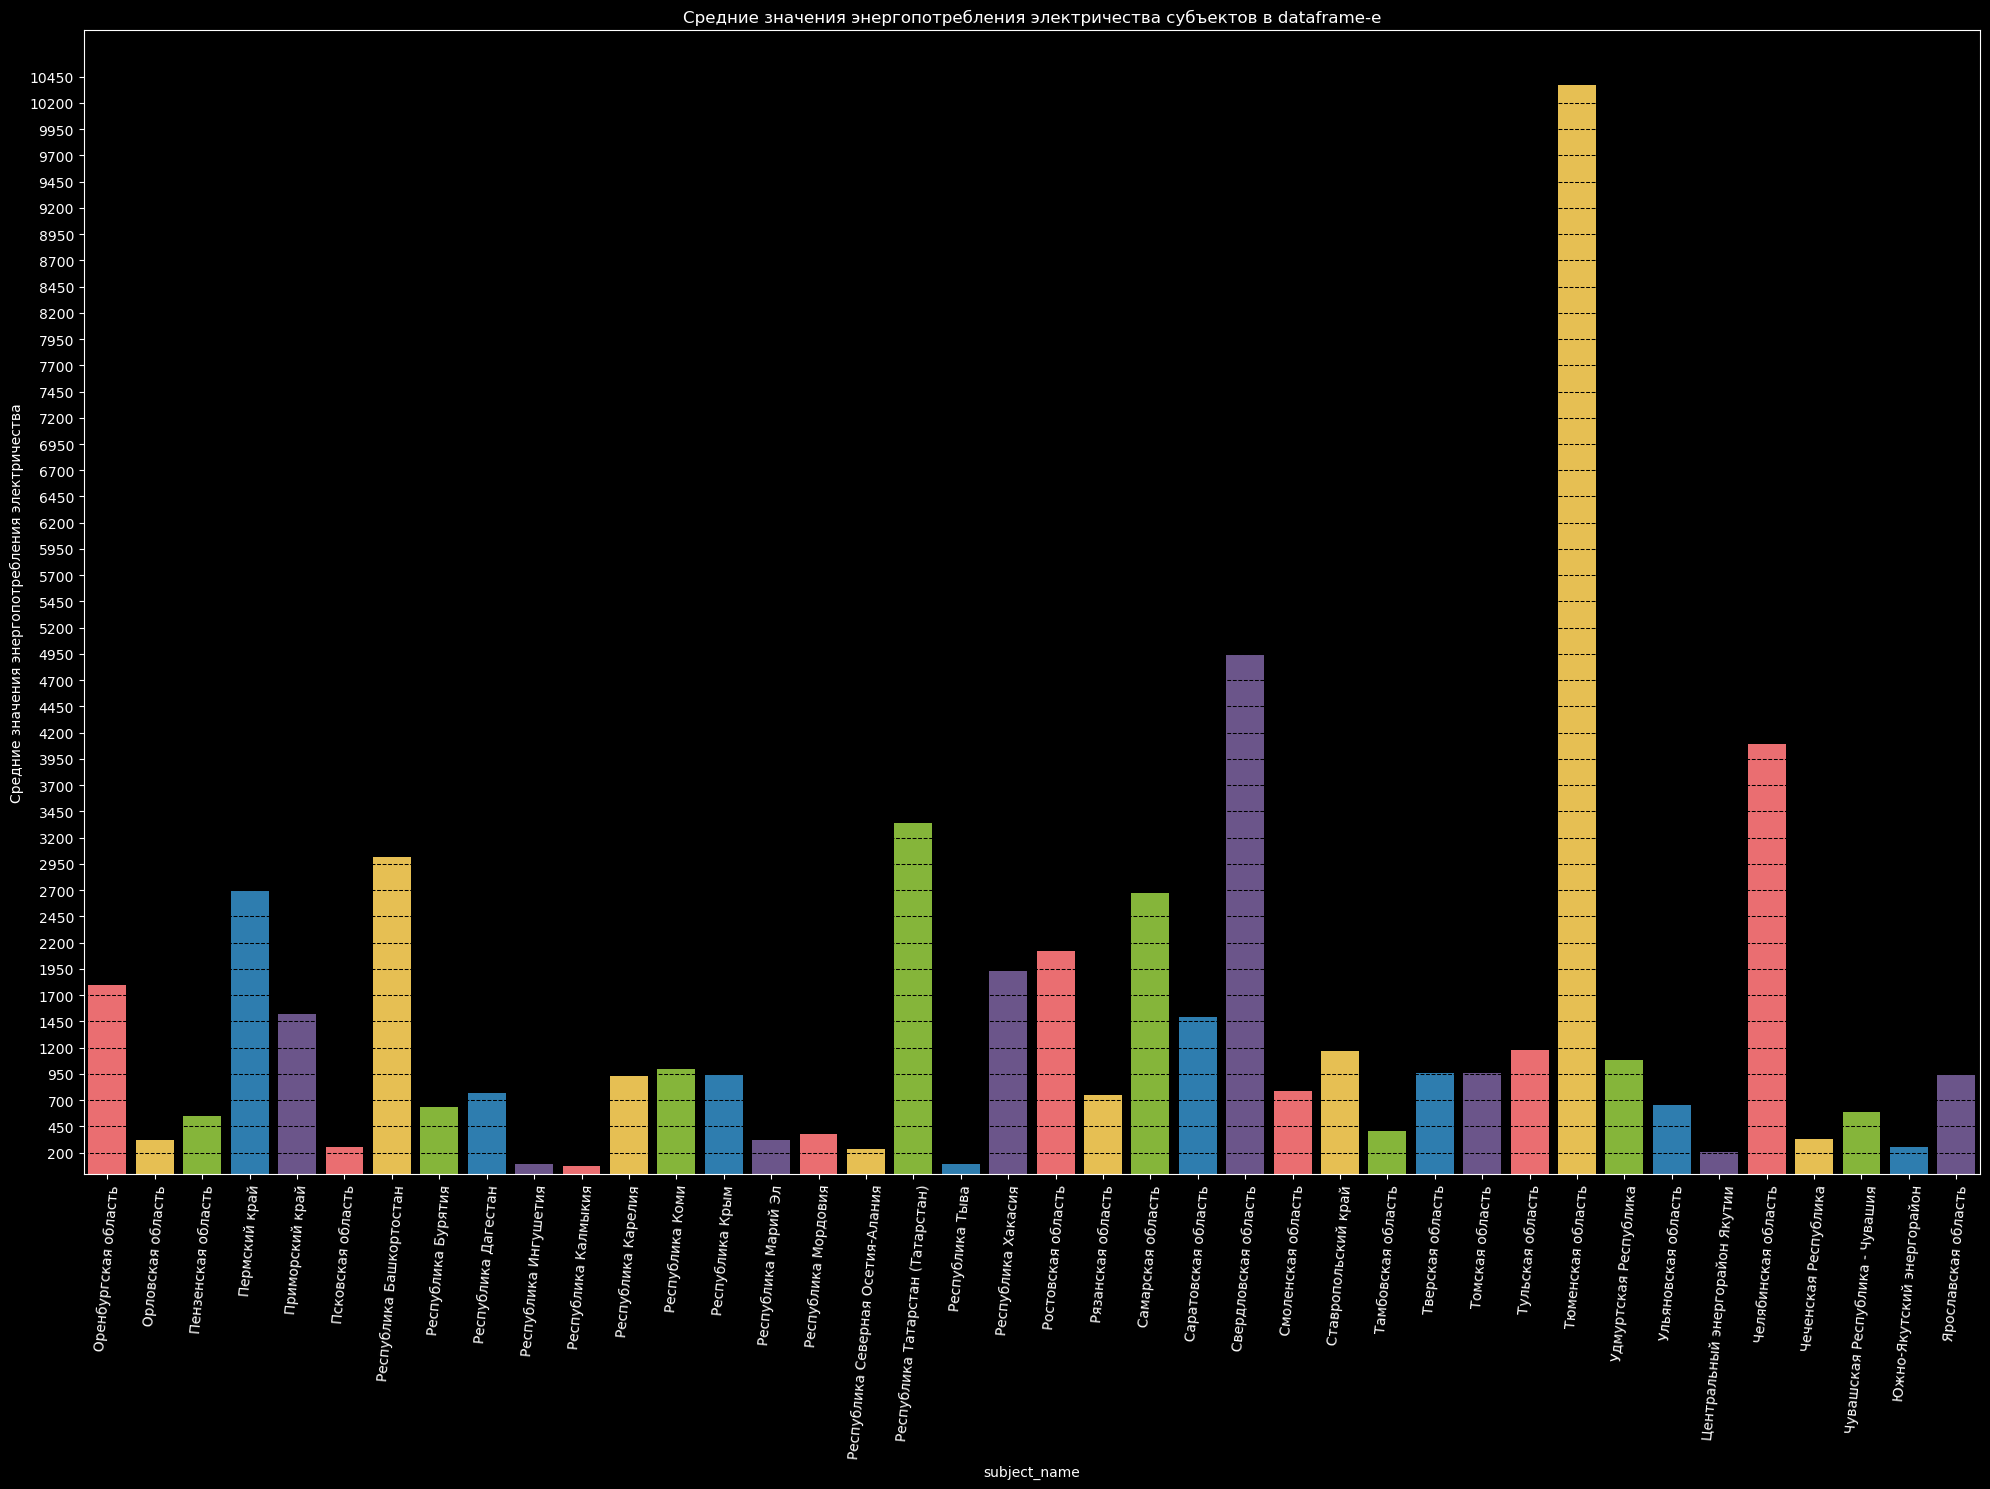

In [11]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

# Заголовок графика:
plt.title("Средние значения энергопотребления электричества субъектов в dataframe-е")

# Создание сетки на графике:
plt.grid(True) 

# Настройки сетки графика:
plt.grid(
         color="black",
         linestyle='--',
         linewidth=0.75
        )

# Подпись оси OX:
plt.xlabel("Субъекты", fontweight="bold")

# Подпись оси OY:
plt.ylabel("Средние значения энергопотребления электричества", fontweight="bold")

# Поворот названий категорий:
plt.xticks(rotation=85, fontweight="bold")

# Частота делений OY шкалы графика:
plt.yticks(np.arange(
                     200,
                     10500,
                     250
                    ), fontweight="bold")

# Создание сущности графика:
sns.barplot(
            x=df.groupby(by="subject_name")["actual_consumption"].mean().index[35:],
            y=df.groupby(by="subject_name")["actual_consumption"].mean().values[35:],
            palette=custom_palette
           );

# Прорисовка графика:
plt.tight_layout()
plt.show()

**Средние значения между субъектами сильно различаются.**

___________________________________________________________________________________________________________________________

**Рассмотрим размахи (разница между min и max значениями) энергопотребления субъектов:**

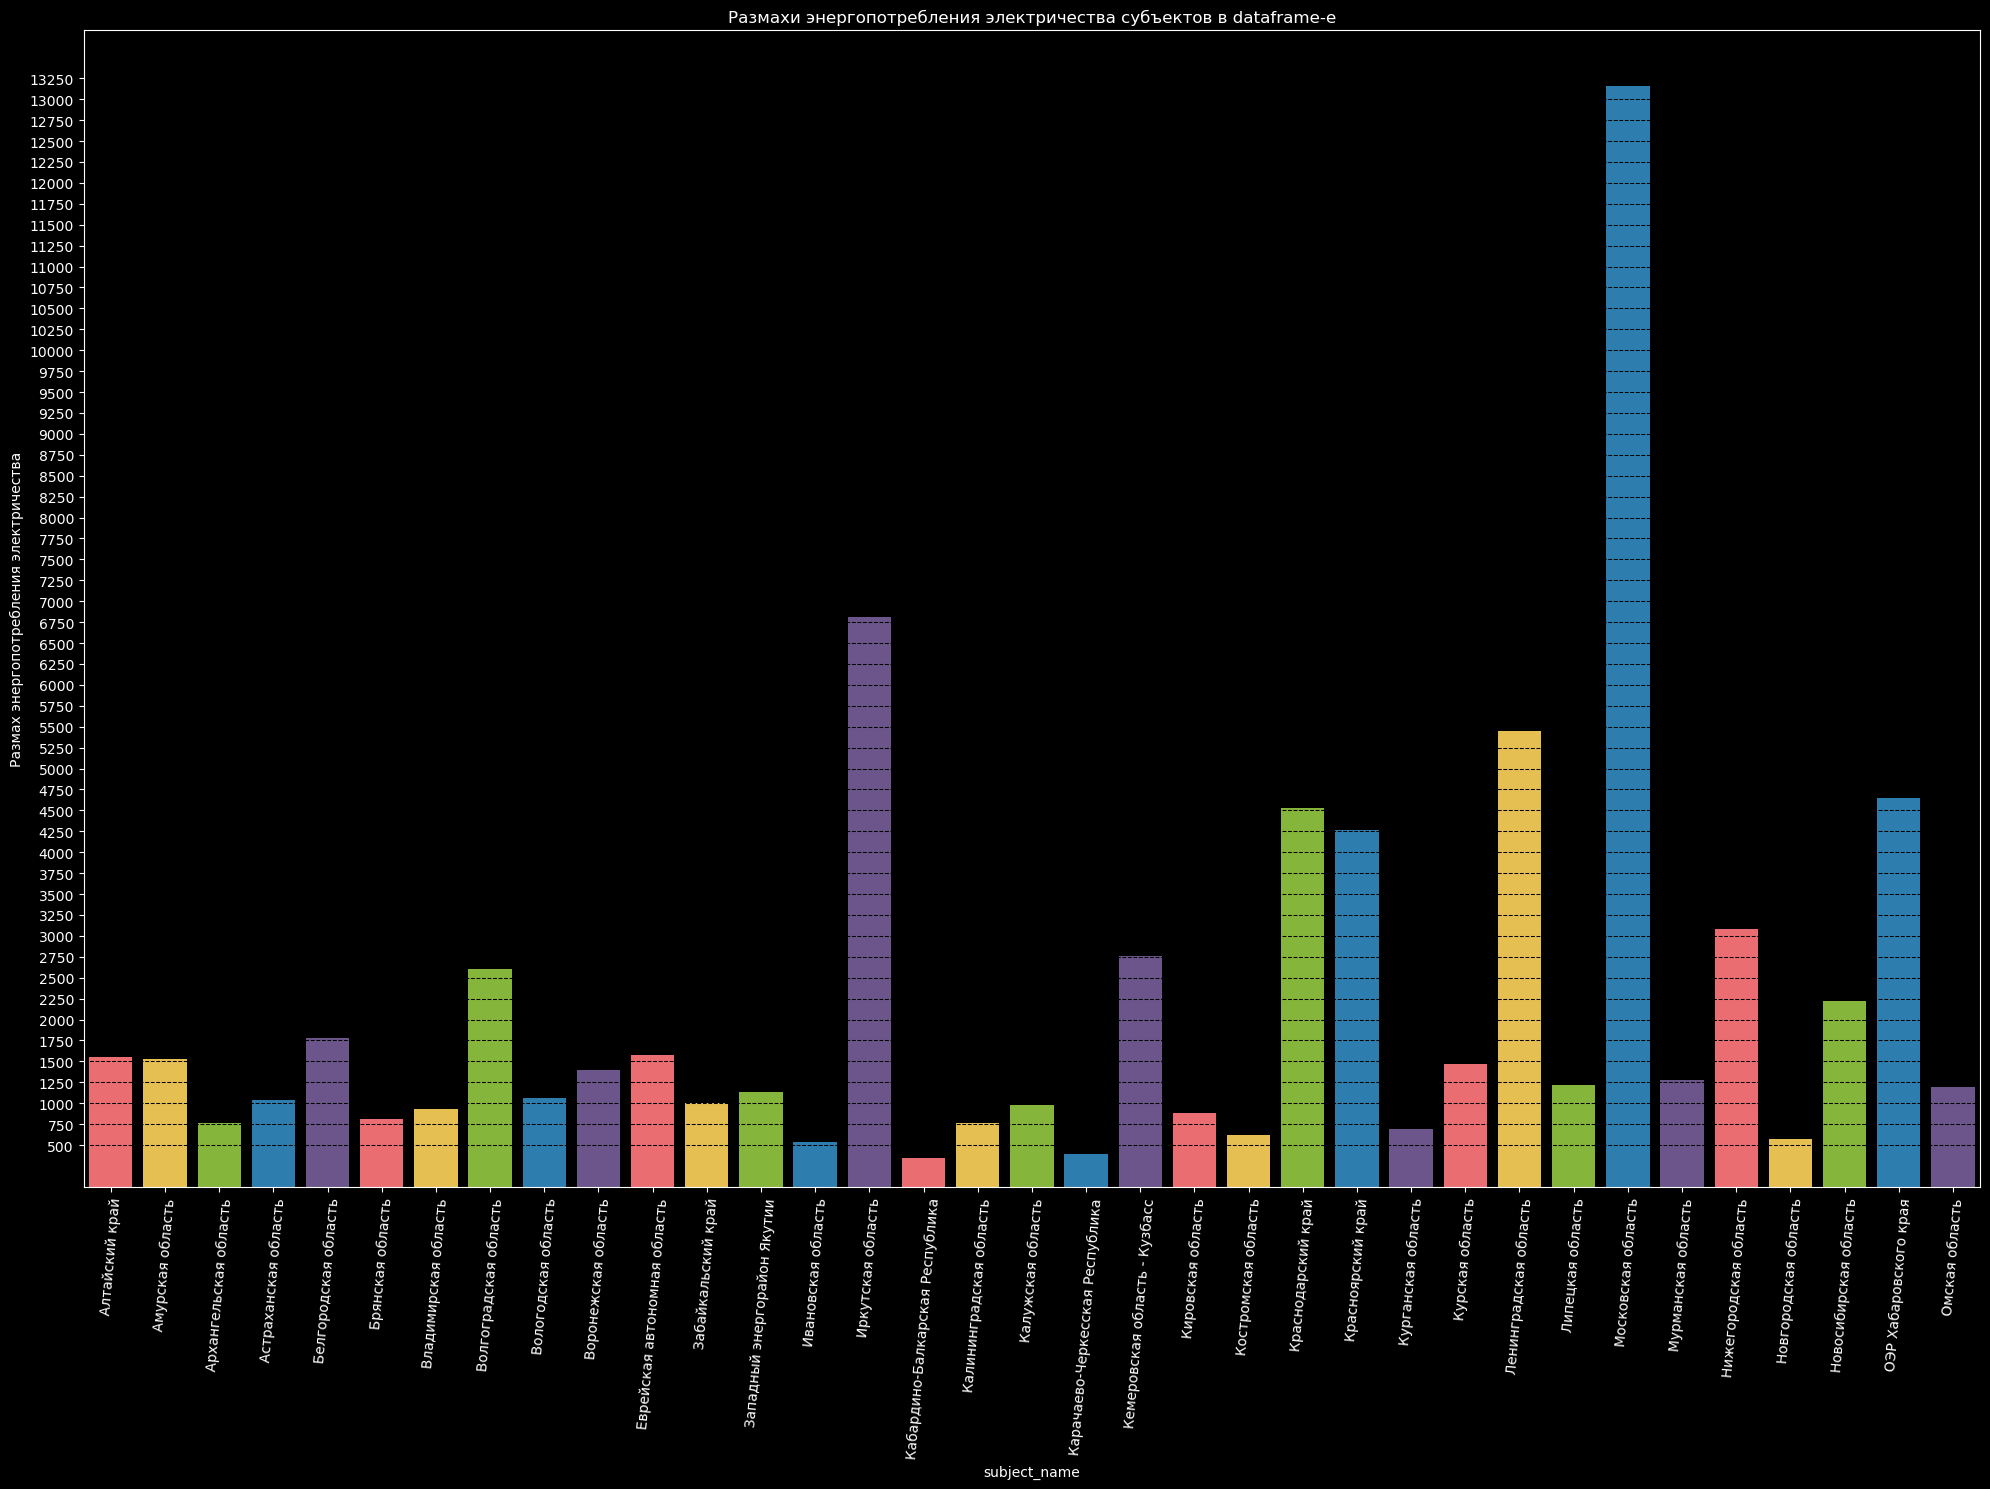

In [12]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

# Заголовок графика:
plt.title("Размахи энергопотребления электричества субъектов в dataframe-е")

# Создание сетки на графике:
plt.grid(True) 

# Настройки сетки графика:
plt.grid(
         color="black",
         linestyle='--',
         linewidth=0.75
        )

# Подпись оси OX:
plt.xlabel("Субъекты", fontweight="bold")

# Подпись оси OY:
plt.ylabel("Размах энергопотребления электричества", fontweight="bold")

# Поворот названий категорий:
plt.xticks(rotation=85, fontweight="bold")

# Частота делений OY шкалы графика:
plt.yticks(np.arange(
                     500,
                     13500,
                     250
                    ), fontweight="bold")

# Создание сущности графика:
sns.barplot(
            x=df.groupby(by="subject_name")["actual_consumption"].apply(np.ptp).index[:35],
            y=df.groupby(by="subject_name")["actual_consumption"].apply(np.ptp).values[:35],
            palette=custom_palette
           );

# Прорисовка графика:
plt.tight_layout()
plt.show()

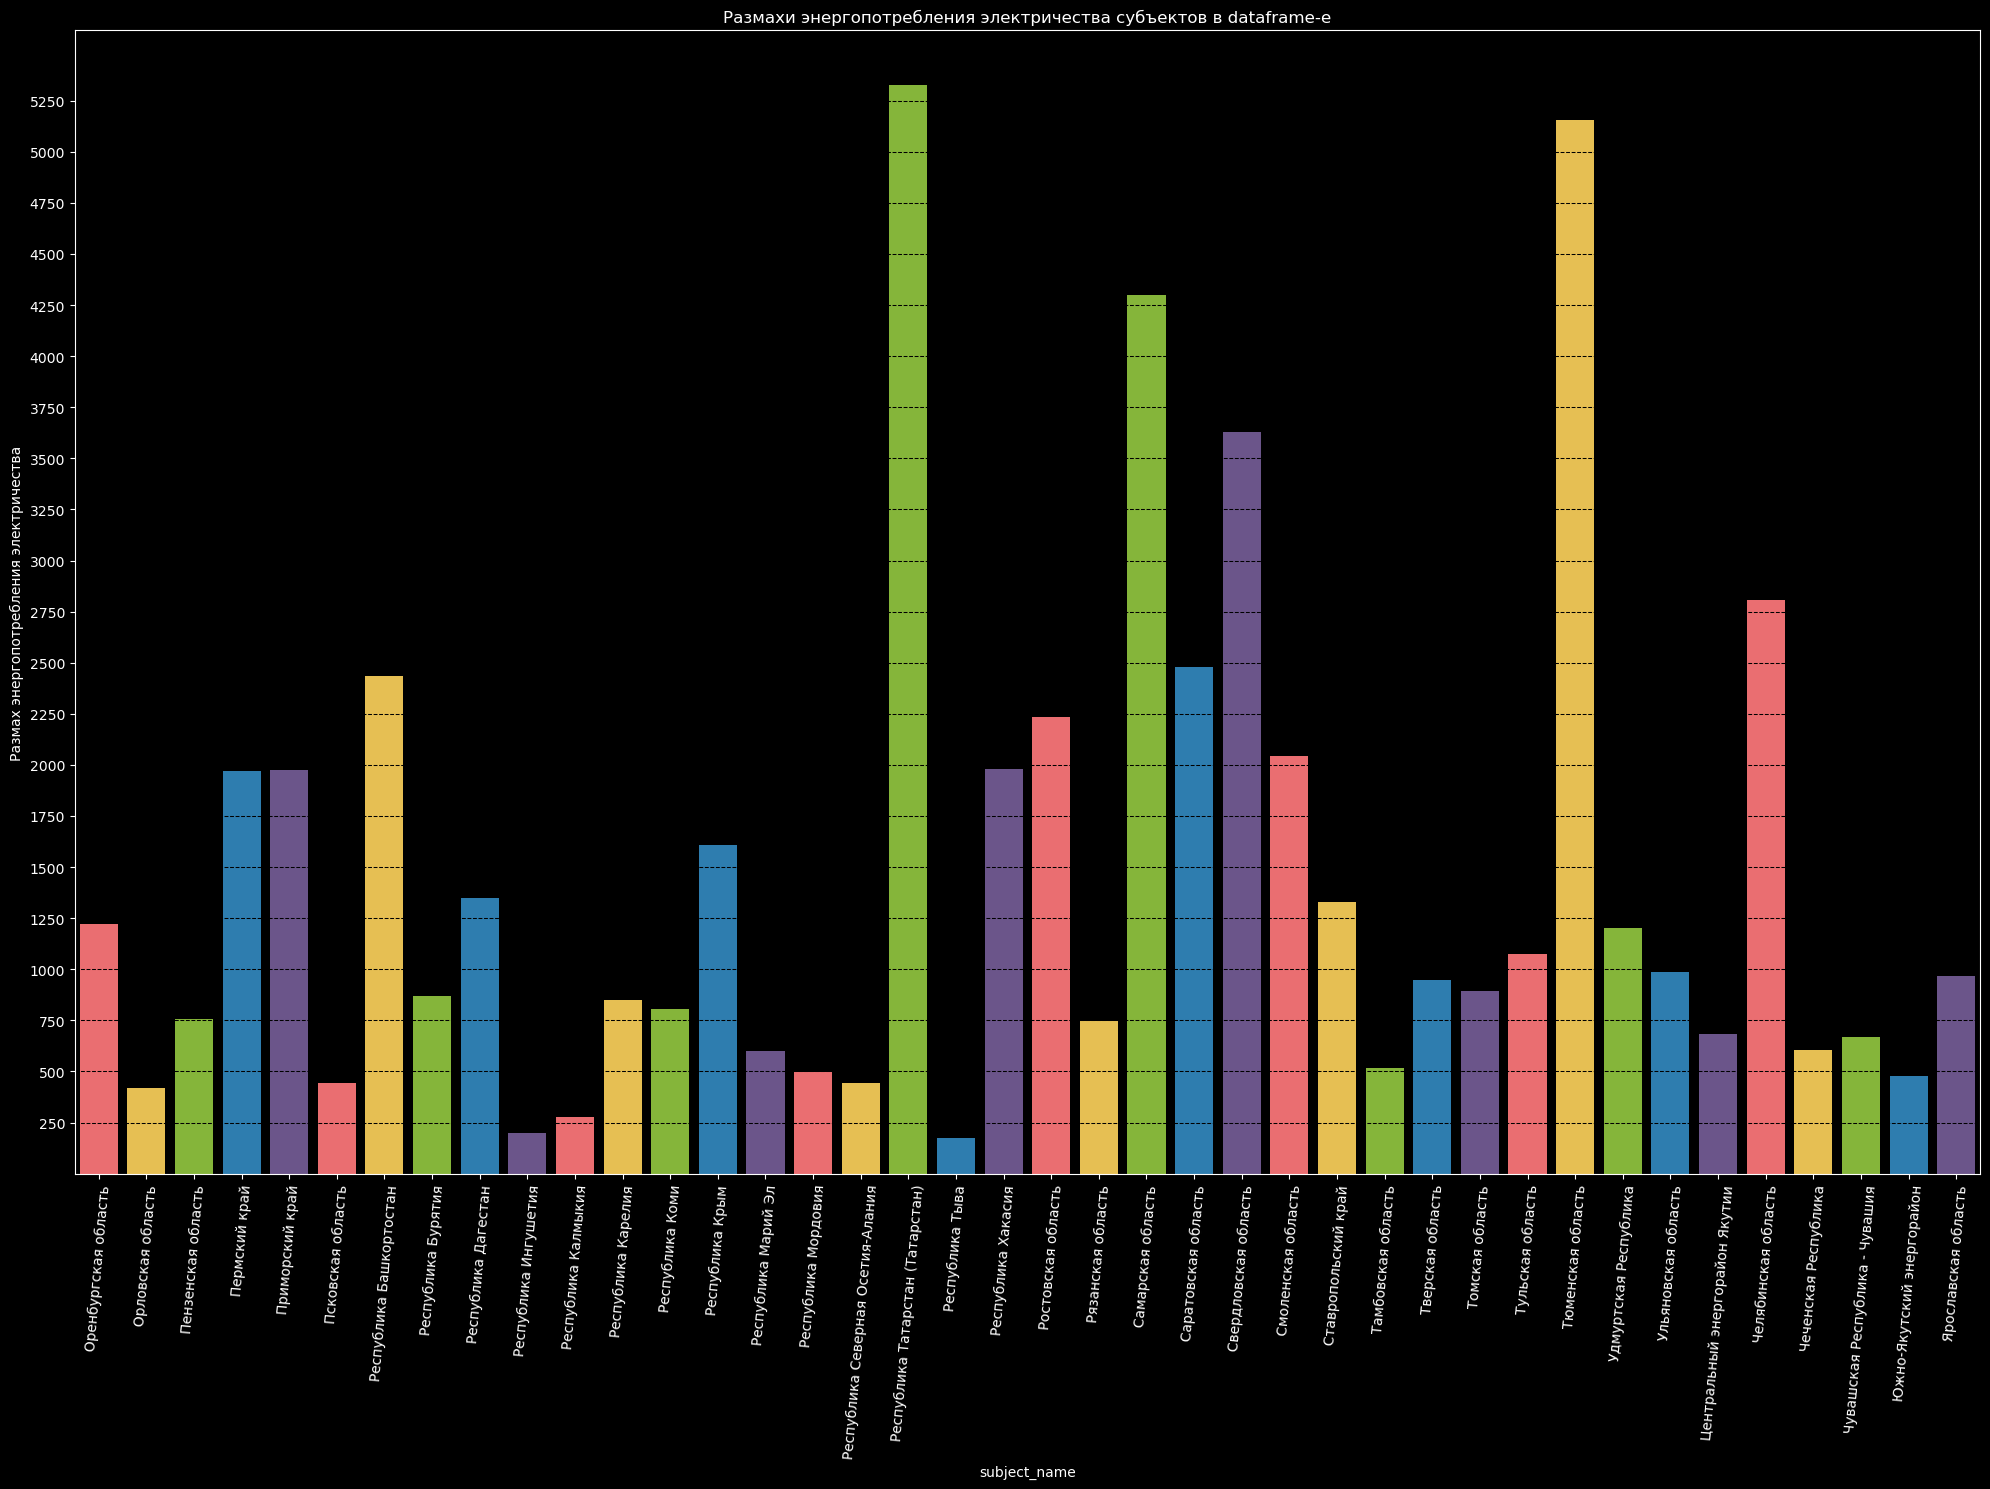

In [13]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

# Заголовок графика:
plt.title("Размахи энергопотребления электричества субъектов в dataframe-е", fontweight="bold")

# Создание сетки на графике:
plt.grid(True) 

# Настройки сетки графика:
plt.grid(
         color="black",
         linestyle='--',
         linewidth=0.75
        )

# Подпись оси OX:
plt.xlabel("Субъекты", fontweight="bold")

# Подпись оси OY:
plt.ylabel("Размах энергопотребления электричества", fontweight="bold")

# Поворот названий категорий:
plt.xticks(rotation=85, fontweight="bold")

# Частота делений OY шкалы графика:
plt.yticks(np.arange(
                     250,
                     5500,
                     250
                    ), fontweight="bold")

# Создание сущности графика:
sns.barplot(
            x=df.groupby(by="subject_name")["actual_consumption"].apply(np.ptp).index[35:],
            y=df.groupby(by="subject_name")["actual_consumption"].apply(np.ptp).values[35:],
            palette=custom_palette
           );

# Прорисовка графика:
plt.tight_layout()
plt.show()

**Размахи части субъекто крайне велики. Это означает: большое количество выбросов, данные имеют сильную вариативность в одном субъекте.**

___________________________________________________________________________________________________________________________

**Проверим заполненность временного признака:**

In [14]:
dates = pd.to_datetime(df.datetime.unique())

In [15]:
print(f"Все ли даты заполнены: {bool(len(dates) == len([1 for date in rrule(HOURLY, dtstart=min(dates), until=max(dates))]))}")

Все ли даты заполнены: False


**Имеются пропуски по данным, рассмотрим количество пропущенных дней:**

In [16]:
print(f"""Количество пропущенных дней в среднем на субъект: {
                                                            (len([1 for date in rrule(HOURLY,
                                                                                      dtstart=min(dates),
                                                                                      until=max(dates)
                                                                                     )]) - len(dates)) / 75 / 24:.2f}""")

Количество пропущенных дней в среднем на субъект: 1.61


**Количество пропущенных дней чуть меньше 2 в среднем на субъект - это некритично.**

___________________________________________________________________________________________________________________________

**Рассмотрим, все измерения энергопотреблений субъектов:**

In [17]:
subj_names = base_df.subject_name.unique()

**Субъект № 1 - `Алтайский край`:**

In [18]:
curr_subj_df

NameError: name 'curr_subj_df' is not defined

In [ ]:
curr_subj_df = df[df["subject_name"] == subj_names[0]].copy()

In [ ]:
curr_subj_df["year"] = curr_subj_df["datetime"].apply(get_year)

In [ ]:
curr_subj_df["month"] = curr_subj_df["datetime"].apply(get_month)

In [ ]:
curr_subj_df["day_of_month"] = curr_subj_df["datetime"].apply(get_day_month)

In [ ]:
curr_subj_df["hour"] = curr_subj_df["datetime"].apply(get_hour)

In [ ]:
curr_subj_df["day_of_week"] = curr_subj_df["datetime"].apply(get_day_week)

In [ ]:
curr_subj_df["day_of_year"] = curr_subj_df["datetime"].apply(get_day_year)

In [ ]:
curr_subj_df

In [ ]:
curr_subj_step = pd.Series(range(df[df["subject_name"] == subj_names[0]].shape[0]))

In [ ]:
sns.regplot(
            x=
)

In [ ]:
# Установка размера графика:
plt.figure(figsize=(20, 15))

sns.regplot(
            x=curr_subj_step,
            y=df[df["subject_name"] == subj_names[0]]["actual_consumption"])